# Acceso a conjunto de datos

In [ ]:
#hay que instalar ciertas versiones de biblioteca para que funcione pandas_profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#despues de correr esta celda apretar boton restart runtime si asi se indica

In [ ]:
# soporte para cargar dataset de https://www.openml.org/
!pip install openml
import openml



**Listar datasets de OpenML**

In [ ]:
datasets_df = openml.datasets.list_datasets(output_format='dataframe')
print(datasets_df.head(n=10))

    did             name  ...  NumberOfNumericFeatures NumberOfSymbolicFeatures
2     2           anneal  ...                      6.0                     33.0
3     3         kr-vs-kp  ...                      0.0                     37.0
4     4            labor  ...                      8.0                      9.0
5     5       arrhythmia  ...                    206.0                     74.0
6     6           letter  ...                     16.0                      1.0
7     7        audiology  ...                      0.0                     70.0
8     8  liver-disorders  ...                      6.0                      0.0
9     9            autos  ...                     15.0                     11.0
10   10            lymph  ...                      3.0                     16.0
11   11    balance-scale  ...                      4.0                      1.0

[10 rows x 16 columns]


# **Descargar un dataset**

In [ ]:
# Iris dataset https://www.openml.org/d/61
dataset = openml.datasets.get_dataset(61)


# Print a summary
print(f"This is dataset '{dataset.name}', the target feature is "
      f"'{dataset.default_target_attribute}'")
print(f"URL: {dataset.url}")
print(dataset.description[:500])

This is dataset 'iris', the target feature is 'class'
URL: https://www.openml.org/data/v1/download/61/iris.arff
**Author**: R.A. Fisher  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall  
**Please cite**: [UCI Citation Policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

**Iris Plants Database**  
This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 in


**Obtener datos del dataset**

In [ ]:
# X - An array/dataframe where each row represents one example with
# the corresponding feature values.
# y - the classes for each example
# categorical_indicator - an array that indicates which feature is categorical
# attribute_names - the names of the features for the examples (X) and
# target feature (y)
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)



In [ ]:
attribute_names

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

In [ ]:
X

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa' < 'Iris-versicolor' < 'Iris-virginica']

In [ ]:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)
combined_data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Análisis exploratorio de datos

**Estadísticas del conjunto de datos (Dataframe)**
Genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN.

In [ ]:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)
combined_data.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualizar el conjunto de datos**

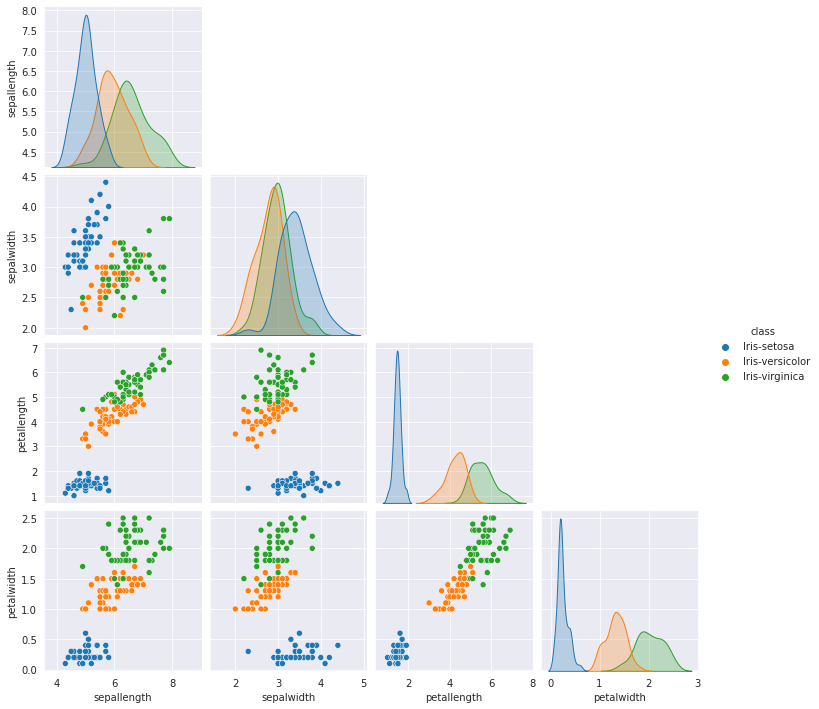

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    


# We combine all the data so that we can map the different
# examples to different colors according to the classes.
combined_data = pd.concat([X, y], axis=1)
iris_plot = sns.pairplot(combined_data, hue="class")
iris_plot.map_upper(hide_current_axis)
plt.show()

**Informe del conjunto de datos** Pandas profiling es un modulo que permite hacer facilmente un análisis exploratorio de los datos mediante estadísticas y representaciones gráficas con unas pocas líneas de código

In [ ]:
from pandas_profiling import ProfileReport


combined_data = pd.concat([X, y], axis=1)

#print(combined_data)
#combined_data.describe()

#%matplotlib inline
profile = ProfileReport(combined_data)
profile


#pandas_profiling.ProfileReport(combined_data)

# Tareas de pre-procesamiento

**Tratamiento de valores faltantes**

In [ ]:
import pandas as pd

combined_data = pd.concat([X, y], axis=1)

combined_data

Generamos valores faltantes al azar

In [ ]:
import random
import numpy as np

combined_data = pd.concat([X, y], axis=1)


random.seed( 42 )

cant_nan=100
for r in range(0,cant_nan):
      combined_data.iat[random.randint(0, len(combined_data)-1) , random.randint(0, len(combined_data.columns)-2)] = np.nan

combined_data

**Tratamiento de valores faltantes (Pandas)**

In [ ]:
combined_data_pandas=combined_data.fillna(combined_data.mean()) 
combined_data_pandas


**Tratamiento de valores faltantes(Scikit-Learn)**

In [ ]:
from sklearn.impute import SimpleImputer 

#combined_data = pd.concat([X, y], axis=1)
#print(combined_data.head())

dfdrop=combined_data.drop('class',axis=1)
print(dfdrop.head())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer = imputer.fit(dfdrop) 
imputed_data = pd.DataFrame(imputer.transform(dfdrop)) 

print(imputed_data.head())
imputed_data.columns=X.columns
combined_data_sci = pd.concat([imputed_data, y], axis=1)

print(combined_data_sci)





**Manejo de texto y atributos categóricos (Scikit-Learn)**

**Agregamos atributos categéricos con valores al azar**

In [ ]:
combined_data = pd.concat([X, y], axis=1)

combined_data['size'] = np.random.choice(['small','medium', 'large'], combined_data.shape[0])
combined_data['color'] = np.random.choice(['red','green', 'blue'], combined_data.shape[0])

combined_data

**Atributos categóricos ordinales**

In [ ]:
size_mapping = {
  'large': 3,
  'medium': 2,
  'small': 1}
combined_data['size'] = combined_data['size'].map(size_mapping)
combined_data


,sepallength,sepalwidth,petallength,petalwidth,class,size,color
0,5.1,3.5,1.4,0.2,Iris-setosa,1,red
1,4.9,3.0,1.4,0.2,Iris-setosa,1,red
2,4.7,3.2,1.3,0.2,Iris-setosa,1,red
3,4.6,3.1,1.5,0.2,Iris-setosa,3,green
4,5.0,3.6,1.4,0.2,Iris-setosa,2,red
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,green
146,6.3,2.5,5.0,1.9,Iris-virginica,2,green
147,6.5,3.0,5.2,2.0,Iris-virginica,1,red
148,6.2,3.4,5.4,2.3,Iris-virginica,1,green


**Atributos nominales: one hot encoding (Pandas)**

In [ ]:
combined_data_pan=pd.get_dummies(combined_data, prefix=['col'],columns=['color'])
combined_data_pan

**Atributos nominales: one hot encoding(Scikit-Learn)**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')
dataset = pd.DataFrame (columnTransformer.fit_transform(combined_data))
dataset.columns= pd.Index(['col_blue', 'col_green','col_red']).append(combined_data.columns.drop('color'))
print(combined_data)
dataset

**Codificación de etiquetas de clase**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
class_cat = combined_data["class"]
class_cat_encoded = encoder.fit_transform(class_cat)

combined_data["class"]=class_cat_encoded
print(class_cat_encoded)
print(encoder.classes_)

combined_data

**Transformación de datos: normalización min-max (Scikit-Learn)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('num', MinMaxScaler(), [1])], remainder='passthrough')
dataset = pd.DataFrame(columnTransformer.fit_transform(combined_data))
dataset.columns=combined_data.columns
dataset

**Transformación de datos de multiples atributos(Scikit-Learn)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


t = [('cat', OneHotEncoder(), [6]), ('num', MinMaxScaler(), [0,1,2,3])]

columnTransformer = ColumnTransformer(transformers=t, remainder='passthrough')
dataset = pd.DataFrame(columnTransformer.fit_transform(combined_data))

dataset

**Transformación  de datos de multiples atributos en pipeline(Scikit-Learn)**

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['sepallength',	'sepalwidth',	'petallength',	'petalwidth']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())])

categorical_features = ['color']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],remainder='passthrough')

dataset = pd.DataFrame(preprocessor.fit_transform(combined_data))
dataset



**Reducción de datos**

In [ ]:
from sklearn.model_selection import train_test_split

per=0.1
_, reduced_ds = train_test_split(combined_data, test_size=int(per * len(combined_data)), random_state=42, stratify=combined_data['class'])
print (len(combined_data))
print (len(reduced_ds))
reduced_ds
